In [198]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as linear_model
import sklearn as skl
import sktime as sktime

In [199]:
np.random.seed(42)

In [200]:
data = np.zeros((2, 1, 100))
data[:, 0, 0] = [0, 0]

for i in range(100):
    if i == 0:
        continue
    random = np.random.normal(0.05, 1) 
    data[0, 0, i] = data[0, 0, i - 1] + random
    data[1, 0, i] = data[1, 0, i - 1] - random


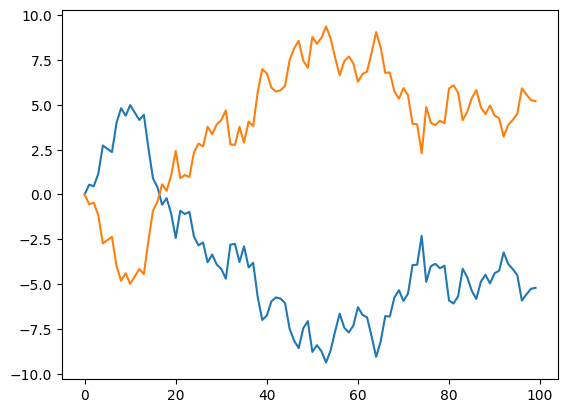

In [201]:
plt.plot(data[0, 0, :])
plt.plot(data[1, 0, :])

In [202]:
n = 100
data0_array = np.zeros((n, 100))
data1_array = np.zeros((n, 100))

for i in range(n):
    data0_array[i, :] = data[0, 0, :] + np.random.normal(0, 1, 100)
    data1_array[i, :] = data[1, 0, :] + np.random.normal(0, 1, 100)


(160, 1, 100)
(160,)
(40, 1, 100)
(40,)


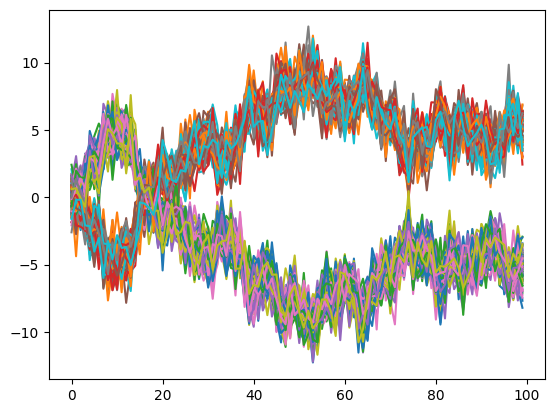

In [203]:
data0_array = data0_array.reshape((n, 1, 100))
data1_array = data1_array.reshape((n, 1, 100))

for i in range(n):
    plt.plot(data0_array[i, 0, :])
    plt.plot(data1_array[i, 0, :])

# print(data0_array.shape)
# print(data1_array.shape)

p = int(n * 0.8)

train_x = np.concatenate((data0_array[:p, :, :], data1_array[:p, :, :]), axis=0)
train_y = np.concatenate((np.zeros(n), np.ones(n)))[:2*p]

permutation = np.random.permutation(len(train_y))

# Shuffle both train_x and train_y using the permutation
train_x = train_x[permutation]
train_y = train_y[permutation]

test_x = np.concatenate((data0_array[p:, :, :], data1_array[p:, :, :]), axis=0)
test_y = np.concatenate((np.zeros(n), np.ones(n)))[2*p:]

permutation = np.random.permutation(len(test_y))
test_x = test_x[permutation]
test_y = test_y[permutation]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(-15.0, 15.0)

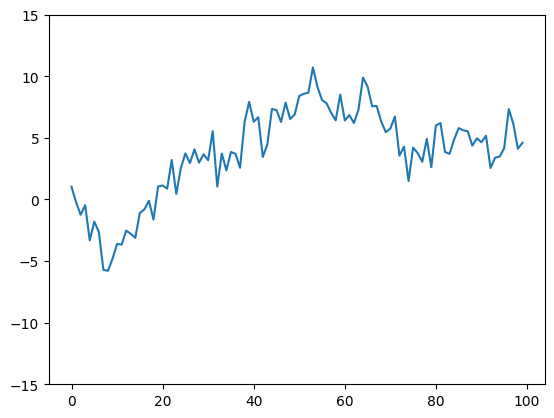

In [204]:
plt.plot(test_x[0, 0, :])
plt.ylim(-15, 15)

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sktime.classification.kernel_based import RocketClassifier

rocket = RocketClassifier(num_kernels=2000)
rocket.fit(train_x, train_y)
rocket





RocketClassifier(num_kernels=2000)

In [206]:
y_pred = rocket.predict(test_x)
accuracy_score(test_y, y_pred)

0.475